ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
voila 0.3.1 requires nbconvert<7,>=6.0.0, but you have nbconvert 5.6.1 which is incompatible.


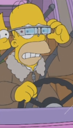

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
path = Path('Simpsons')
path = Path()
learn_inf = load_learner(path/'export.pkl')
#upload widget
btn_upload = widgets.FileUpload()
img = PILImage.create('images/Screenshot (2130).png')
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
                     
#make prediction with pretrained model
pred, pred_idx, probs = learn_inf.predict(img)
                     
#Use a label to display predictions
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred
                     
#crating a button to do classification
btn_run = widgets.Button(description = 'Classify')
btn_run
#establishing ClickEventHandler -> these are the called func when button pressed
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)

In [ ]:
#Put all widgets into a VBox (Vertical Box)
out_pl.clear_output()
#lbl_pred.clear()
VBox([widgets.Label('Select your Simpsons character!'), 
     btn_upload, btn_run, out_pl, lbl_pred])